<a href="https://colab.research.google.com/github/LavyaS/skill-new/blob/main/Skilllca3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MERGE

In [7]:
# Suppress all warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the os module (optional here, but useful for file path operations if needed)
import os

# List of file paths for the CSV files to be loaded
csv_files = [
    '/content/UNSW_2018_IoT_Botnet_Full5pc_1.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_2.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_3.csv',
    '/content/UNSW_2018_IoT_Botnet_Full5pc_4.csv'
]

# Read each CSV file into a DataFrame and store them in a list
df_list = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames from the list into a single DataFrame
# ignore_index=True resets the index in the new combined DataFrame
df = pd.concat(df_list, ignore_index=True)

# Print the total number of rows in the combined DataFrame
print("Total rows after concatenation:", len(df))


Total rows after concatenation: 915480


 Label Encoding

In [8]:
# Import LabelEncoder from scikit-learn to convert categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Drop rows where the 'subcategory' column has missing values (NaN)
df = df.dropna(subset=['subcategory'])

# Create a LabelEncoder object to encode categorical labels
le = LabelEncoder()

# Fit the label encoder on the 'subcategory' column and transform it into numeric codes
# Add the resulting encoded labels as a new column 'subcategory_encoded'
df['subcategory_encoded'] = le.fit_transform(df['subcategory'])

# Count the occurrences of each class in the original 'subcategory' column
subcat_counts = df['subcategory'].value_counts()

# Print the count of each class before removing rare ones
print("These are the classes count after encoding:\n", df['subcategory'].value_counts())

# Identify rare classes (those with fewer than 100 instances)
rare_classes = subcat_counts[subcat_counts < 100].index

# Filter out the rows that belong to rare classes
df = df[~df['subcategory'].isin(rare_classes)]

# Print the count of classes after removing rare ones
print("Remaining classes after removing rare ones:\n", df['subcategory'].value_counts())



These are the classes count after encoding:
 subcategory
UDP     458306
TCP     455685
HTTP      1485
Name: count, dtype: int64
Remaining classes after removing rare ones:
 subcategory
UDP     458306
TCP     455685
HTTP      1485
Name: count, dtype: int64


 Data Visualization and Class Distribution Analysis

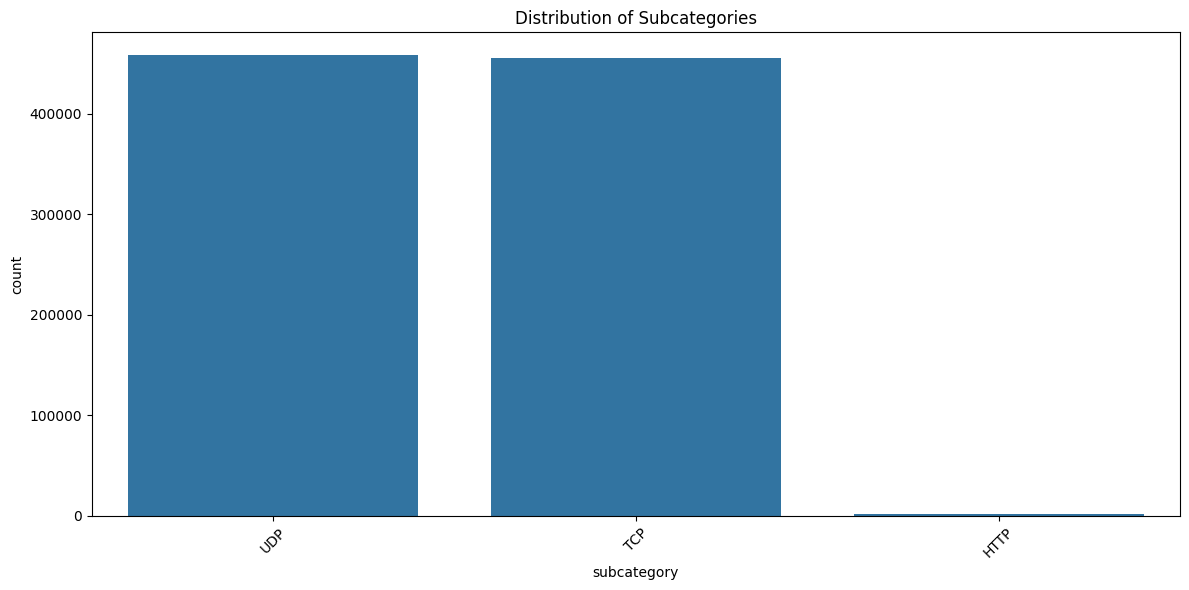

subcategory
UDP     458306
TCP     455685
HTTP      1485
Name: count, dtype: int64


In [9]:
# Importing the necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Create a count plot (bar chart) for the 'subcategory' column
# The bars are ordered based on the frequency of each subcategory (from most to least common)
sns.countplot(data=df, x='subcategory', order=df['subcategory'].value_counts().index)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add a title to the plot
plt.title('Distribution of Subcategories')

# Automatically adjust subplot params so the plot fits nicely into the figure area
plt.tight_layout()

# Display the plot
plt.show()

# Define the expected final size of the dataset (if needed for reference or validation)
final_size = 101010

# Count the number of instances for each remaining subcategory
counts = df['subcategory'].value_counts()

# Print the count of each subcategory after filtering
print(counts)


Stratified Sampling and Class Balancing

In [10]:
# Identify minor classes: those with fewer samples than the average quota per class
minor_classes = counts[counts < (final_size // len(counts))].index

# Identify major classes: those with more samples than the average quota per class
major_classes = counts[counts >= (final_size // len(counts))].index

# Extract all records that belong to the minor classes
minor_df = df[df['subcategory'].isin(minor_classes)]

# Calculate the remaining number of samples needed to reach the final desired dataset size
remaining_quota = final_size - len(minor_df)

# Initialize a list to hold sampled data from major classes
major_df_list = []

# Loop through each major class to sample a proportional number of rows
for label in major_classes:
    # Get all rows for the current major class
    class_df = df[df['subcategory'] == label]

    # Calculate the number of samples to take based on its proportion in the major classes
    sample_size = int((counts[label] / counts[major_classes].sum()) * remaining_quota)

    # Sample the data and append to the list
    major_df_list.append(class_df.sample(n=sample_size, random_state=42))

# Combine the minor classes and proportionally sampled major classes
final_df = pd.concat([minor_df] + major_df_list, ignore_index=True)

# Shuffle the final dataset to avoid any ordering bias
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shape of the final, balanced dataset
print("Final dataset shape:", final_df.shape)

final_df.to_csv('bot_iot_100k.csv', index=False)
print("Final dataset saved as 'bot_iot_100k.csv'")

df = pd.read_csv('/content/bot_iot_100k.csv')
df.head()

Final dataset shape: (101009, 47)
Final dataset saved as 'bot_iot_100k.csv'


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory,subcategory_encoded
0,188678,1.528081e+09,e,1,tcp,1,192.168.100.150,32890,192.168.100.3,80,...,100.0,100.0,23.270100,23.927600,300.0,300.0,1.0,DoS,TCP,1
1,1033828,1.528085e+09,e,1,udp,3,192.168.100.150,1828,192.168.100.3,80,...,100.0,100.0,0.483809,0.483801,1300.0,1300.0,1.0,DoS,UDP,2
2,1167640,1.528085e+09,e,1,udp,3,192.168.100.150,31012,192.168.100.3,80,...,100.0,100.0,0.489010,0.489010,1600.0,1600.0,1.0,DoS,UDP,2
3,3083687,1.528099e+09,e,1,udp,3,192.168.100.149,45884,192.168.100.3,80,...,100.0,22.0,0.575596,0.576641,700.0,154.0,1.0,DDoS,UDP,2
4,2053315,1.528096e+09,e s,2,tcp,1,192.168.100.147,47497,192.168.100.3,80,...,100.0,85.0,0.361669,0.379814,425.0,425.0,1.0,DDoS,TCP,1


DATA CLEANING

In [11]:
# Check for missing values in each column and print the count of missing values per column
print(df.isnull().sum())

# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Print the summary of the DataFrame (info includes column data types and non-null counts)
df.info()


pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

 identifying and understanding the non-numeric columns

In [12]:
# Select columns that are not of numeric type (excluding 'number' data type)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Print a more descriptive message about the non-numeric columns
print("The following columns are non-numeric (i.e., categorical or object types):")
print(non_numeric_columns)

# Optionally, we can check the types of the non-numeric columns to better understand their data types
print("\nData types of non-numeric columns:")
print(df[non_numeric_columns].dtypes)


The following columns are non-numeric (i.e., categorical or object types):
Index(['flgs', 'proto', 'saddr', 'daddr', 'state', 'category', 'subcategory'], dtype='object')

Data types of non-numeric columns:
flgs           object
proto          object
saddr          object
daddr          object
state          object
category       object
subcategory    object
dtype: object


Data Exploration

In [13]:
# Display the first 5 rows of the dataframe
# This helps us quickly check the structure and content of the dataset
print("First 5 rows of the dataframe:")
print(df.head())

# Optionally, you can specify how many rows to display. For example, to display the first 10 rows:
# print(df.head(10))

# For more detailed inspection, you can display the column names and data types:
print("\nColumn names and their data types:")
print(df.dtypes)

# If you want a summary of the dataframe, including non-null counts and data types:
print("\nDataFrame info (summary of the dataset):")
df.info()


First 5 rows of the dataframe:
   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0   188678  1.528081e+09    e            1   tcp             1   
1  1033828  1.528085e+09    e            1   udp             3   
2  1167640  1.528085e+09    e            1   udp             3   
3  3083687  1.528099e+09    e            1   udp             3   
4  2053315  1.528096e+09  e s            2   tcp             1   

             saddr  sport          daddr  dport  ...  N_IN_Conn_P_DstIP  \
0  192.168.100.150  32890  192.168.100.3     80  ...              100.0   
1  192.168.100.150   1828  192.168.100.3     80  ...              100.0   
2  192.168.100.150  31012  192.168.100.3     80  ...              100.0   
3  192.168.100.149  45884  192.168.100.3     80  ...              100.0   
4  192.168.100.147  47497  192.168.100.3     80  ...              100.0   

   N_IN_Conn_P_SrcIP AR_P_Proto_P_Sport  AR_P_Proto_P_Dport  \
0              100.0          23.270100           23.92760

In [14]:
# Get the count of each unique value in the 'subcategory_encoded' column
subcat_counts = df['subcategory_encoded'].value_counts()

# Print the counts of each subcategory after encoding (before removing rare classes)
print("Class distribution after encoding:\n", subcat_counts)

# Optional: Filtering out rare classes, if needed
# For example, removing classes with fewer than a certain number of samples (e.g., < 100)
rare_classes = subcat_counts[subcat_counts < 100].index
df_filtered = df[~df['subcategory_encoded'].isin(rare_classes)]

# Print the remaining class distribution after removing rare classes
filtered_subcat_counts = df_filtered['subcategory_encoded'].value_counts()
print("\nRemaining classes after removing rare ones:\n", filtered_subcat_counts)


Class distribution after encoding:
 subcategory_encoded
2    49905
1    49619
0     1485
Name: count, dtype: int64

Remaining classes after removing rare ones:
 subcategory_encoded
2    49905
1    49619
0     1485
Name: count, dtype: int64


In [15]:
df = df.drop(columns=['subcategory'])
print(df.head())


   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0   188678  1.528081e+09    e            1   tcp             1   
1  1033828  1.528085e+09    e            1   udp             3   
2  1167640  1.528085e+09    e            1   udp             3   
3  3083687  1.528099e+09    e            1   udp             3   
4  2053315  1.528096e+09  e s            2   tcp             1   

             saddr  sport          daddr  dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.150  32890  192.168.100.3     80  ...           23.927600   
1  192.168.100.150   1828  192.168.100.3     80  ...            0.483801   
2  192.168.100.150  31012  192.168.100.3     80  ...            0.489010   
3  192.168.100.149  45884  192.168.100.3     80  ...            0.576641   
4  192.168.100.147  47497  192.168.100.3     80  ...            0.379814   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0              100.0             100.0           23.270100   
1              100.0  

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [19]:
X = df.drop(columns=['subcategory_encoded'])
y = df['subcategory_encoded']

In [23]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Step 1: Separate numeric and non-numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Step 2: Apply mean imputation to only numeric columns
imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Step 3: Combine with the non-numeric columns (unchanged or separately processed)
X_final = pd.concat([X_numeric_imputed, X[non_numeric_cols].reset_index(drop=True)], axis=1)

# Optional: print a preview
print(X_final.head())


     pkSeqID         stime  flgs_number  proto_number    sport  dport  pkts  \
0   188678.0  1.528081e+09          1.0           1.0  32890.0   80.0   3.0   
1  1033828.0  1.528085e+09          1.0           3.0   1828.0   80.0  13.0   
2  1167640.0  1.528085e+09          1.0           3.0  31012.0   80.0  16.0   
3  3083687.0  1.528099e+09          1.0           3.0  45884.0   80.0   7.0   
4  2053315.0  1.528096e+09          2.0           1.0  47497.0   80.0   5.0   

   bytes  state_number         ltime  ...  AR_P_Proto_P_Dport  \
0  274.0           1.0  1.528081e+09  ...           23.927600   
1  780.0           4.0  1.528085e+09  ...            0.483801   
2  960.0           4.0  1.528085e+09  ...            0.489010   
3  420.0           4.0  1.528099e+09  ...            0.576641   
4  770.0           3.0  1.528096e+09  ...            0.379814   

   Pkts_P_State_P_Protocol_P_DestIP  Pkts_P_State_P_Protocol_P_SrcIP  attack  \
0                             300.0                   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index(['flgs', 'proto', 'saddr', 'daddr', 'state', 'category'], dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder

X_train_encoded = X_train.copy()

for col in non_numeric_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])


step 7: now lets save this new balanced dataset into a new csv file

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# Encode non-numeric columns
X_train_encoded = X_train.copy()
non_numeric_cols = X_train_encoded.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)

# Combine features and target
balanced_data = pd.concat([
    pd.DataFrame(X_train_balanced, columns=X_train_encoded.columns),
    pd.DataFrame(y_train_balanced, columns=['subcategory_encoded'])
], axis=1)

# Save to CSV
balanced_data.to_csv('nice.csv', index=False)
print("\n✅ Balanced training data saved to 'nice.csv'")



visualizing the class distribution

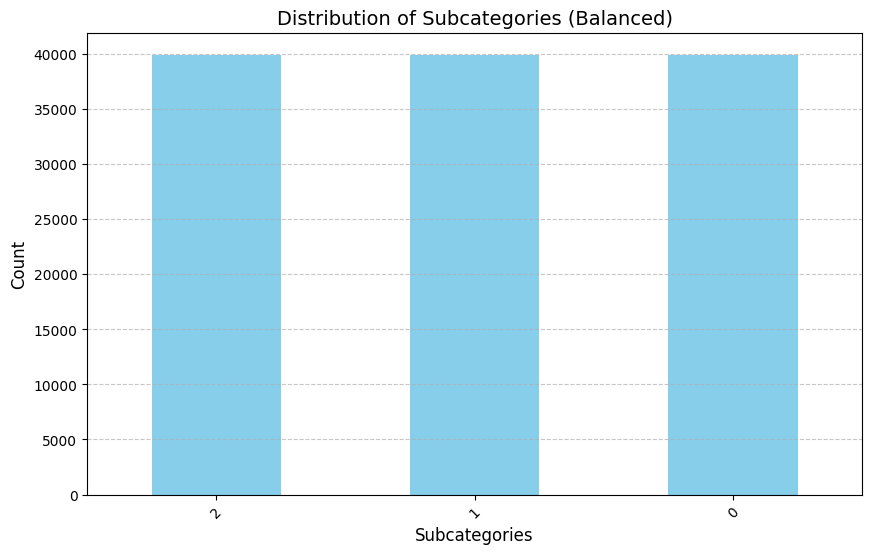

In [36]:
# Define the path to the balanced dataset
file_path = '/content/nice.csv'

# Load the balanced dataset from the specified file path
balanced_data = pd.read_csv(file_path)

# Create a figure for the plot with a specific size
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'subcategory_encoded' column as a bar plot
# The 'value_counts()' function counts the occurrences of each unique value in the column
balanced_data['subcategory_encoded'].value_counts().plot(kind='bar', color='skyblue')

# Add a title to the plot with a specific font size
plt.title('Distribution of Subcategories (Balanced)', fontsize=14)

# Label the x-axis with 'Subcategories' and set the font size for the label
plt.xlabel('Subcategories', fontsize=12)

# Label the y-axis with 'Count' and set the font size for the label
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels (subcategories) by 45 degrees for better visibility
plt.xticks(rotation=45)

# Add grid lines to the y-axis for better readability, with a dashed style and some transparency
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


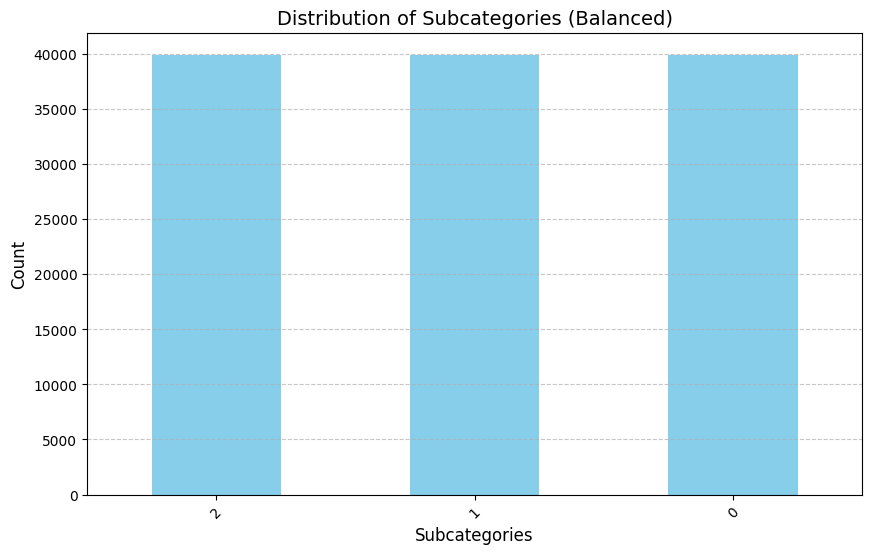

In [38]:
# Define the path to the balanced dataset (CSV file)
file_path = '/content/nice.csv'

# Load the balanced dataset from the CSV file
balanced_data = pd.read_csv(file_path)

# Create a figure for the plot with a specific size (10x6 inches)
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'subcategory_encoded' column as a bar plot.
# 'value_counts()' counts the number of occurrences of each unique value in the column.
# The 'kind='bar'' argument specifies that a bar chart should be used.
balanced_data['subcategory_encoded'].value_counts().plot(kind='bar', color='skyblue')

# Add a title to the plot with a specific font size (14)
plt.title('Distribution of Subcategories (Balanced)', fontsize=14)

# Label the x-axis with 'Subcategories' and set the font size for the label (12)
plt.xlabel('Subcategories', fontsize=12)

# Label the y-axis with 'Count' and set the font size for the label (12)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels (subcategories) by 45 degrees to make them more readable
plt.xticks(rotation=45)

# Add a grid along the y-axis with dashed lines and some transparency (alpha=0.7) for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features=['TnBPSrcIP','TnBPDstIP']
df[features] = scaler.fit_transform(df[features])
print("All features have been standardized.")
print(df.describe())

All features have been standardized.
            pkSeqID         stime    flgs_number   proto_number  \
count  1.010090e+05  1.010090e+05  101009.000000  101009.000000   
mean   1.598468e+06  1.528090e+09       1.601016       1.988189   
std    1.132121e+06  7.387028e+03       0.863137       0.999896   
min    1.000000e+00  1.528081e+09       1.000000       1.000000   
25%    2.206040e+05  1.528085e+09       1.000000       1.000000   
50%    1.222447e+06  1.528089e+09       1.000000       1.000000   
75%    3.000411e+06  1.528099e+09       2.000000       3.000000   
max    3.232024e+06  1.528099e+09       6.000000       3.000000   

               sport          dport           pkts          bytes  \
count  101009.000000  101009.000000  101009.000000  101009.000000   
mean    32890.851993     115.845113       7.644626     668.976170   
std     18908.281627    1258.482896       3.401571     241.763284   
min        -1.000000      -1.000000       2.000000     120.000000   
25%     16143.

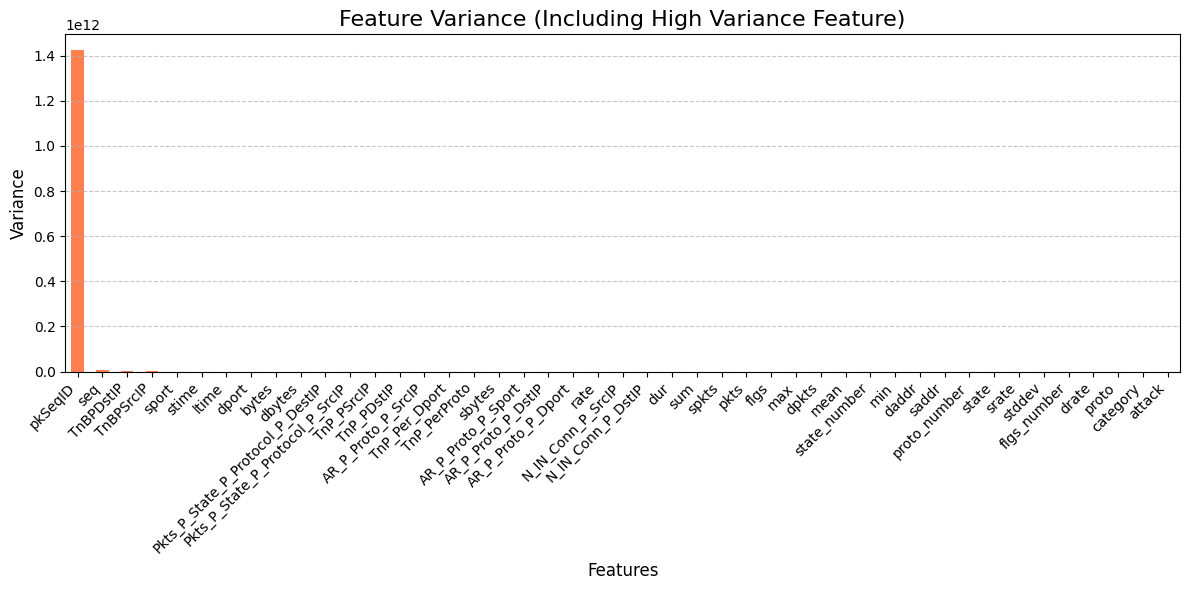

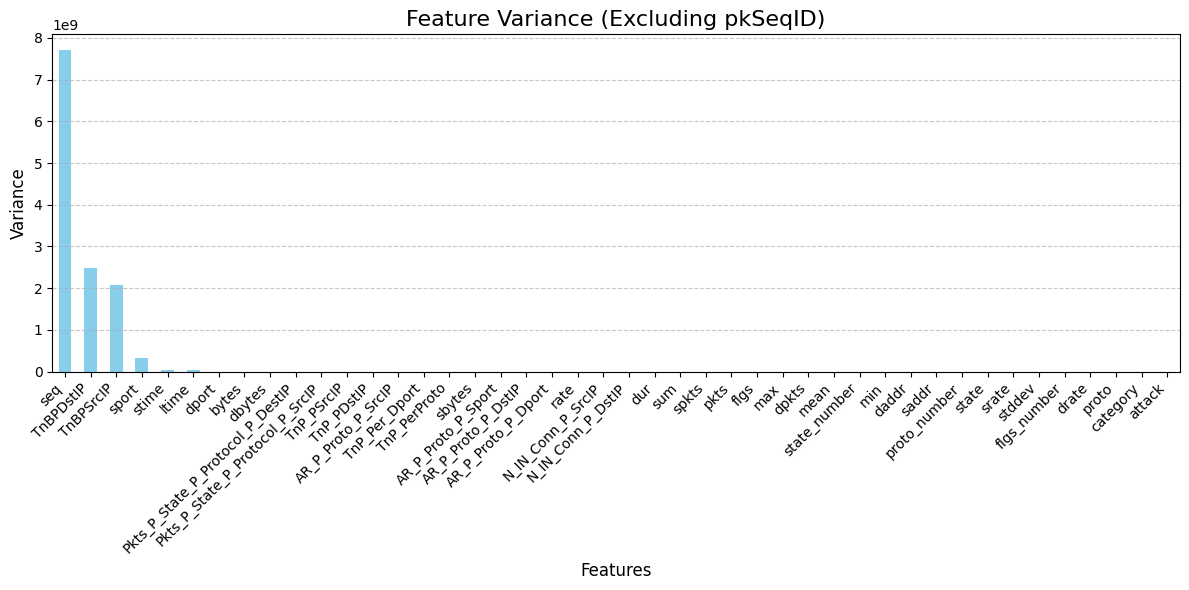

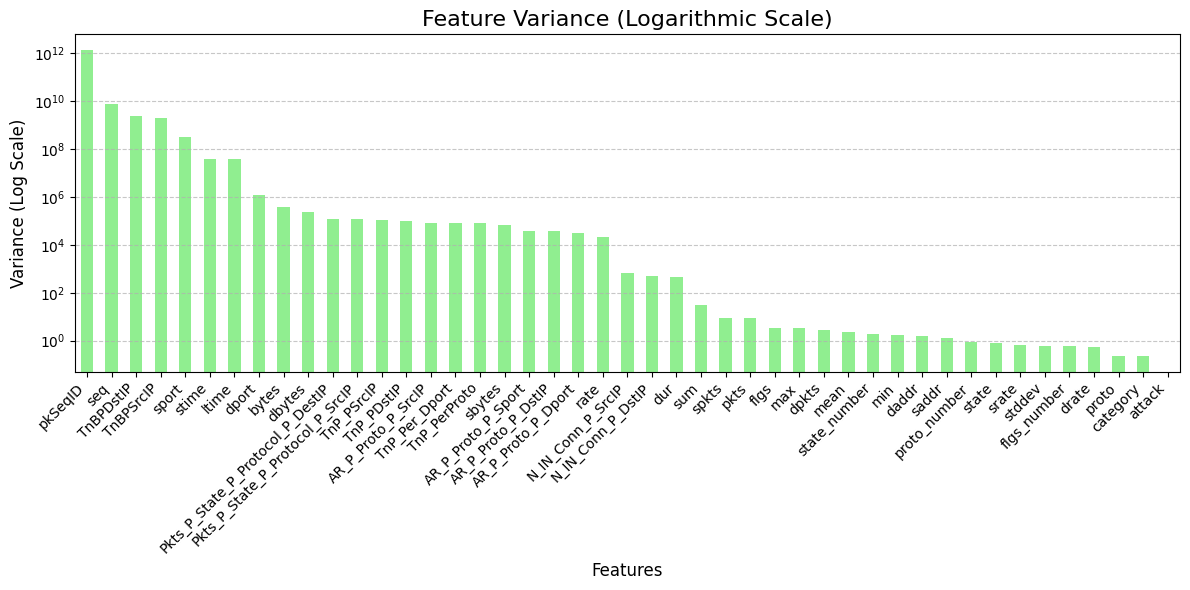

In [70]:
# Assuming 'balanced_data' is your DataFrame
features = balanced_data.drop(columns=['subcategory_encoded'])
variances = features.var()

# Identify the feature with the highest variance
highest_variance_feature = variances.idxmax()

# Create the first plot (original)
plt.figure(figsize=(12, 6))
variances.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Feature Variance (Including High Variance Feature)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a second plot excluding the highest variance feature
other_variances = variances.drop(highest_variance_feature)
plt.figure(figsize=(12, 6))
other_variances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title(f'Feature Variance (Excluding {highest_variance_feature})', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a third plot with a logarithmic scale
plt.figure(figsize=(12, 6))
variances.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Feature Variance (Logarithmic Scale)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualizing the Variance of Features

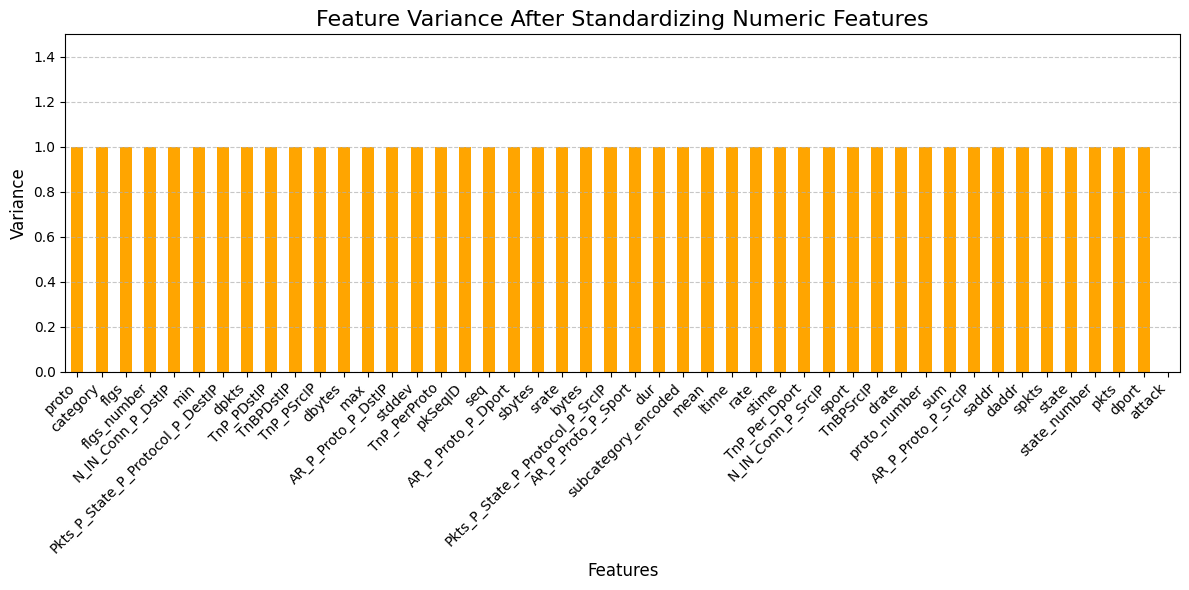


Variance of standardized numeric features:
proto                               1.000008
category                            1.000008
flgs                                1.000008
flgs_number                         1.000008
N_IN_Conn_P_DstIP                   1.000008
min                                 1.000008
Pkts_P_State_P_Protocol_P_DestIP    1.000008
dpkts                               1.000008
TnP_PDstIP                          1.000008
TnBPDstIP                           1.000008
TnP_PSrcIP                          1.000008
dbytes                              1.000008
max                                 1.000008
AR_P_Proto_P_DstIP                  1.000008
stddev                              1.000008
TnP_PerProto                        1.000008
pkSeqID                             1.000008
seq                                 1.000008
AR_P_Proto_P_Dport                  1.000008
sbytes                              1.000008
srate                               1.000008
bytes      

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# **1. Load your DataFrame 'df'**
try:
    df = pd.read_csv('/content/nice.csv')  # Replace 'your_data_file.csv' with the correct path
except FileNotFoundError:
    print("Error: The data file was not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

if df.empty:
    print("Error: The DataFrame is empty after loading. Please check your data file.")
    exit()

# **2. Select numeric columns**
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_cols]

if numeric_df.empty:
    print("Error: No numeric columns found in the DataFrame to standardize.")
    exit()

# **3. Initialize and apply StandardScaler**
scaler = StandardScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# **4. Calculate the variance**
updated_variances = scaled_numeric_df.var()

# **5. Plot the variance**
plt.figure(figsize=(12, 6))
updated_variances.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Feature Variance After Standardizing Numeric Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.5)
plt.tight_layout()
plt.show()

# Optional: Print the variance values
print("\nVariance of standardized numeric features:")
print(updated_variances.sort_values(ascending=False))

Visualizing the Correlation Matrix using a Heatmap.

Shape of the DataFrame: (119772, 46)

Data types of columns:
 pkSeqID                               int64
stime                               float64
flgs                                  int64
flgs_number                           int64
proto                                 int64
proto_number                          int64
saddr                                 int64
sport                                 int64
daddr                                 int64
dport                                 int64
pkts                                  int64
bytes                                 int64
state                                 int64
state_number                          int64
ltime                               float64
seq                                   int64
dur                                 float64
mean                                float64
stddev                              float64
sum                                 float64
min                                 float64
max           

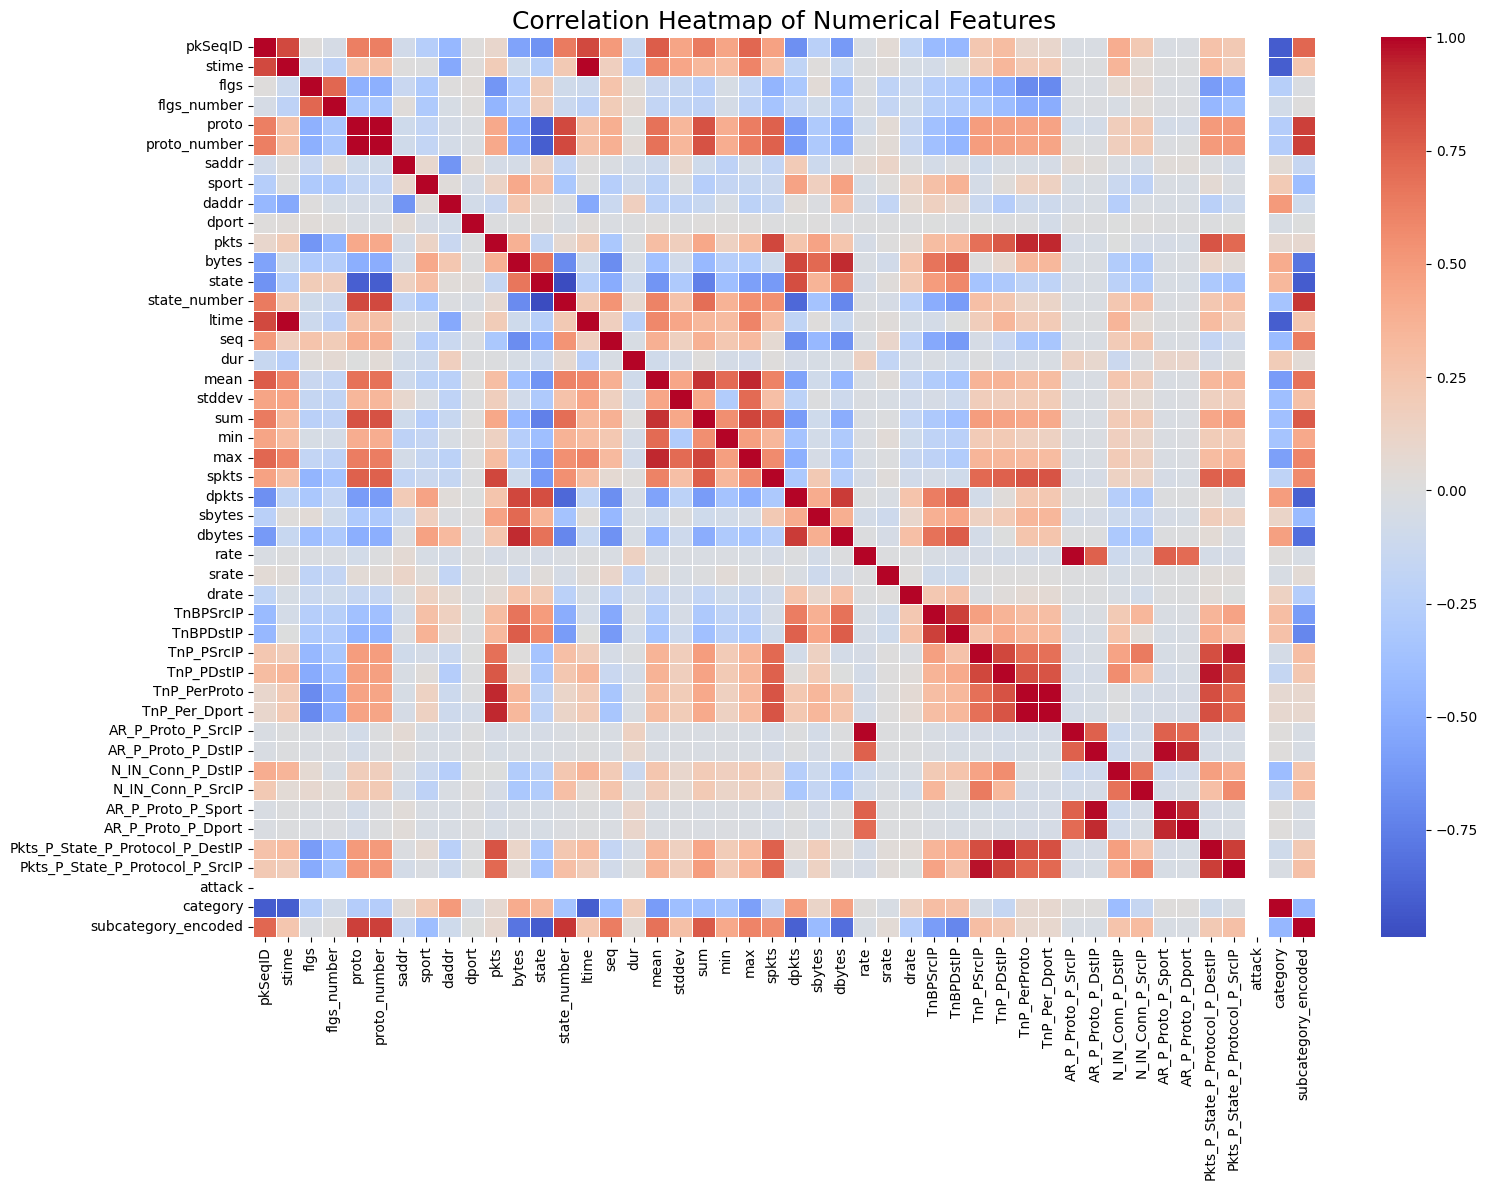

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame (make sure it's loaded correctly)
# Example loading:
# try:
#     df = pd.read_csv('your_data.csv')
# except FileNotFoundError:
#     print("Error: File not found.")
#     exit()

print("Shape of the DataFrame:", df.shape)
print("\nData types of columns:\n", df.dtypes)
print("\nFirst few rows of the DataFrame:\n", df.head())

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
print("\nShape of numeric DataFrame:", numeric_df.shape)
print("\nNumeric columns:\n", numeric_df.columns)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:\n", corr_matrix)

# Check if the correlation matrix is empty or all NaN
if corr_matrix.empty or corr_matrix.isnull().all().all():
    print("\nError: Correlation matrix is empty or contains only NaN values. Check your numeric data.")
else:
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
    plt.tight_layout()
    plt.show()



Categorical Data Visualization using a count plot

Error: Data file not found. Please check the file path.
Column names in your DataFrame:
Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category',
       'subcategory_encoded'],
      dtype='object')
Enter the correct column name for protocol (e.g., 'protocol', 'proto'): proto

Protocol Counts (across all data):
proto
1    79715
2    39924
0      133
Name: count, dtype: int64


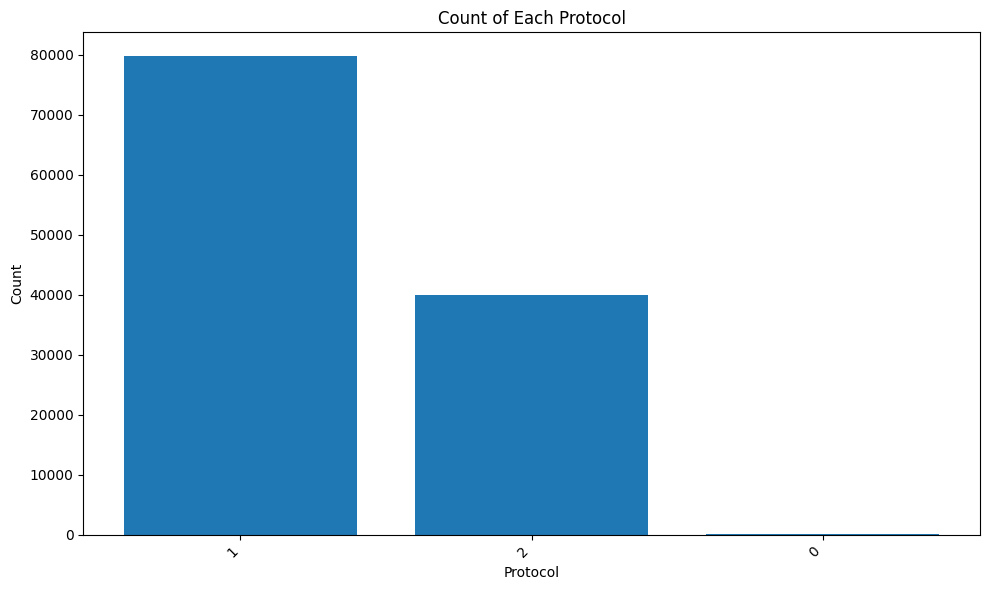

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

try:
    df = pd.read_csv('your_attack_data.csv')
except FileNotFoundError:
    print("Error: Data file not found. Please check the file path.")
    exit()

print("Column names in your DataFrame:")
print(df.columns)

protocol_column = input("Enter the correct column name for protocol (e.g., 'protocol', 'proto'): ")

if protocol_column not in df.columns:
    print(f"Error: Column '{protocol_column}' not found in the DataFrame. Please check the column name and try again.")
    exit()

# Count the occurrences of each protocol in the entire DataFrame
protocol_counts = df[protocol_column].value_counts()

print("\nProtocol Counts (across all data):")
print(protocol_counts)

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(protocol_counts.index.astype(str), protocol_counts.values)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Count of Each Protocol')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Time-Series Line Plot


--- Time-Series Line Plot ---


<ipython-input-1-d777f27d72d3>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='stime', y='subcategory_encoded', data=df_sorted, ci=None)


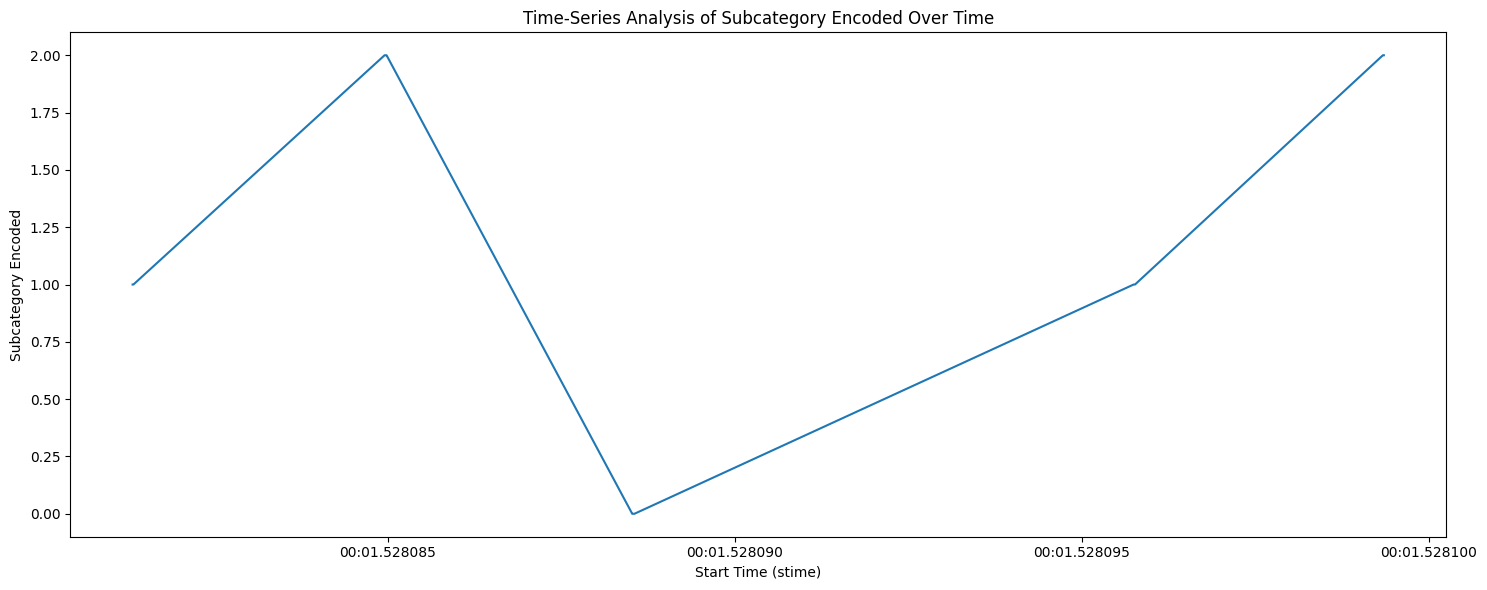


--- End of Time-Series Line Plot ---


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- Load your DataFrame ---
try:
    df = pd.read_csv('/content/nice.csv')  # Replace 'your_data_file.csv' with the actual path
except FileNotFoundError:
    print("Error: The data file was not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# --- Time-Series Line Plot ---
print("\n--- Time-Series Line Plot ---")

# Step 1: Check the data types and ensure 'stime' is datetime
df['stime'] = pd.to_datetime(df['stime'], errors='coerce')  # Convert 'stime' to datetime, if necessary
df.dropna(subset=['stime', 'subcategory_encoded'], inplace=True)  # Drop rows with missing values

# Step 2: Sort the DataFrame by 'stime'
df_sorted = df.sort_values(by='stime')

# Step 3: Check for remaining missing values
if df_sorted['stime'].isnull().any() or df_sorted['subcategory_encoded'].isnull().any():
    print("Warning: There are still missing values in 'stime' or 'subcategory_encoded' after initial cleaning. The plot might be affected.")
else:
    # Step 4: Create the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='stime', y='subcategory_encoded', data=df_sorted, ci=None)

    # Step 5: Add title and axis labels
    plt.title('Time-Series Analysis of Subcategory Encoded Over Time')
    plt.xlabel('Start Time (stime)')
    plt.ylabel('Subcategory Encoded')

    # Step 6: Display the plot
    plt.tight_layout()
    plt.show()

print("\n--- End of Time-Series Line Plot ---")

Feature Correlation Analysis

In [4]:
correlations = df.corr()['subcategory_encoded'].drop('subcategory_encoded')
top_corr_features = correlations.abs().sort_values(ascending=False)
print("Top correlated features with target:\n")
print(top_corr_features.head(10))

Top correlated features with target:

state           0.913917
state_number    0.898976
dpkts           0.888277
proto_number    0.865495
proto           0.865295
dbytes          0.823577
bytes           0.798735
sum             0.774422
pkSeqID         0.727363
TnBPDstIP       0.708091
Name: subcategory_encoded, dtype: float64


 Forward Sequential Feature Selection (SFS)

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
# For iterative feature selection.

from sklearn.linear_model import LogisticRegression
# The classification model used for evaluation.

from sklearn.model_selection import StratifiedKFold
# Cross-validation ensuring balanced class representation.


In [23]:
df_sampled = df.sample(n=5000, random_state=42)
# Creates a random sample of 5000 rows from the DataFrame 'df' for faster processing.

In [24]:
X = df_sampled.select_dtypes(include='number').drop(columns=['subcategory_encoded'])
# Numeric features, excluding the target.

y = df_sampled['subcategory_encoded']
# The target variable.

In [25]:
model = LogisticRegression(max_iter=1000)

In [26]:

sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=10,
    direction='forward',
    cv=StratifiedKFold(n_splits=3),
    n_jobs=-1
)

In [ ]:
sfs.fit(X, y)

In [16]:
!pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming 'df' is your full DataFrame loaded previously
# and 'selected_features' is the list of features you want to use
X_full = df[selected_features]
y_full = df['subcategory_encoded']

In [30]:
df_sampled = df.sample(n=5000, random_state=42)

In [31]:
X = df_sampled.select_dtypes(include='number').drop(columns=['subcategory_encoded'])
y = df_sampled['subcategory_encoded']

In [32]:
model = LogisticRegression(max_iter=1000)

In [33]:
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=10,
    direction='forward',
    cv=StratifiedKFold(n_splits=3),
    n_jobs=-1
)

step 6: lets fit the selector

step 7: diplay the selected features

In [ ]:
selected_features = X.columns[sfs.get_support()].tolist()
print(" Features selected by Forward Selection:\n", selected_features)

 Features selected by Forward Selection:
 ['bytes', 'state', 'sum', 'sbytes', 'drate', 'TnP_PerProto', 'TnP_Per_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'category']


standardizing the features in your data

In [39]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize StandardScaler for feature scaling.
scaler = StandardScaler()

# Fit the scaler to the data X and transform it, resulting in standardized features.
X_scaled = scaler.fit_transform(X)

In [40]:
# Initialize a Logistic Regression model with Elastic Net regularization and cross-validation.
elastic = LogisticRegressionCV(
    penalty='elasticnet',
    solver='saga',
    l1_ratios=[0.9],
    Cs=[0.01, 0.1, 1],
    cv=5,
    scoring='accuracy',
    max_iter=5000,
    n_jobs=-1
)

step 4: lets fit the model

In [ ]:
elastic.fit(X_scaled, y)

LogisticRegressionCV(Cs=[0.01, 0.1, 1], cv=5, l1_ratios=[0.9], max_iter=5000,
                     n_jobs=-1, penalty='elasticnet', scoring='accuracy',
                     solver='saga')

 LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score

step 2: lets scale the features first

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

step 3: lets train the model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

step 4: lets predict and evaluate

In [ ]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f" Logistic Regression Accuracy: {acc:.4f}")

 Logistic Regression Accuracy: 0.9996


In [ ]:
from sklearn.ensemble import BaggingClassifier

Feature Selection

In [ ]:
# Selects the columns from the DataFrame 'df' that are listed in 'selected_features' to create the feature matrix 'X_full'.
X_full = df[selected_features]

# Selects the 'subcategory_encoded' column from the DataFrame 'df' to create the target variable 'y_full'.
y_full = df['subcategory_encoded']

Feature List

In [ ]:
# Defines a list of feature names to be selected.
selected_featuress=['proto','state','state_number','proto_number','mean','max','stime','ltime','seq','stddev']

In [ ]:
_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

Data Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
base_model = LogisticRegression(max_iter=1000)
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

In [ ]:
bagging_model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_samples=0.8,
                  n_jobs=-1, random_state=42)

In [ ]:
y_pred_bag = bagging_model.predict(X_test_scaled)
bagging_acc = accuracy_score(y_test, y_pred_bag)
print(f" Bagging Accuracy (Logistic Regression): {bagging_acc:.4f}")

 Bagging Accuracy (Logistic Regression): 0.9997
